In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import utils_auto 

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
df ={}

In [6]:
paper_list = ['1106_6060','1508_00296','2004_04168','2008_08998','2110_11330']

In [7]:
for paper in paper_list:
    df[paper] = utils_auto.yaml_to_df(paper+'/final_answer.yaml')

In [35]:
df.keys()

dict_keys(['1106_6060', '1508_00296', '2004_04168', '2008_08998', '2110_11330'])

In [39]:
df['2110_11330']

,answer1,answer2,answer3,answer4,paper,trial_idx
1,correct,correct,correct,correct,2110.11330,1
2,correct,incorrect,incorrect,incorrect,2110.11330,2
3,correct,correct,correct,correct,2110.11330,3
4,correct,correct,correct,correct,2110.11330,4
5,correct,correct,correct,correct,2110.11330,5
6,correct,correct,correct,correct,2110.11330,6
7,correct,correct,correct,correct,2110.11330,7
8,correct,incorrect,incorrect,correct,2110.11330,8
9,correct,correct,correct,correct,2110.11330,9
10,correct,correct,correct,correct,2110.11330,10


# Eval accuracy: for paper

In [17]:
total=40
eval_paper={}
for paper in paper_list:
    eval_paper[paper]=df[paper][['answer1', 'answer2', 'answer3', 'answer4']].applymap(lambda x: False if 'F' in x else True).values.sum()/total

In [38]:
eval_paper_df = pd.DataFrame.from_dict(eval_paper, orient='index', columns=['Value'])

Text(0, 0.5, 'Autoevaluation Accuracy')

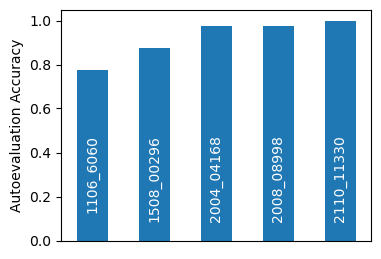

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,3))
ax = eval_paper_df.plot(kind='bar', legend=False,ax=ax)
ax.tick_params(axis='x', pad=-80, color='w', labelcolor='w')
ax.set_ylabel('Autoevaluation Accuracy')

# Eval accuracy: for different task

In [57]:
eval_task={}
for paper in paper_list:
    eval_task[paper]=df[paper][['answer1', 'answer2', 'answer3', 'answer4']].applymap(lambda x: False if 'F' in x else True).values.mean(axis=0)

In [58]:
eval_task

{'1106_6060': array([1. , 1. , 0.1, 1. ]),
 '1508_00296': array([1. , 1. , 0.5, 1. ]),
 '2004_04168': array([1. , 1. , 0.9, 1. ]),
 '2008_08998': array([1. , 1. , 1. , 0.9]),
 '2110_11330': array([1., 1., 1., 1.])}

In [61]:
task_mean = np.stack(list(eval_task.values())).mean(axis=0)
task_mean_df = pd.DataFrame(task_mean, index=["Task 1", "Task 2", "Task 3", "Task 4"], columns=["Mean Value"])
task_mean_df

,Mean Value
Task 1,1.00
Task 2,1.00
Task 3,0.70
Task 4,0.98


Text(0, 0.5, 'Autoevaluation Accuracy')

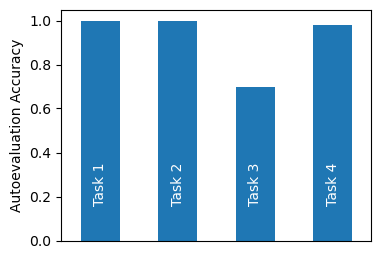

In [63]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,3))
ax = task_mean_df.plot(kind='bar', legend=False,ax=ax)
ax.tick_params(axis='x', pad=-60, color='w', labelcolor='w')
ax.set_ylabel('Autoevaluation Accuracy')

# Coding:  for different tasks

In [12]:
maps_={
    "correct, F": False,
    "incorrect, F": True,
    "correct": True,
    "incorrect": False,
    "uncertain": False
}

In [13]:
total=40
code_paper={}
for paper in paper_list:
    code_paper[paper]=df[paper][['answer1', 'answer2', 'answer3', 'answer4']].applymap(lambda x: maps_[x]).values.sum()/total

In [27]:
code_paper_df = pd.DataFrame.from_dict(code_paper, orient='index', columns=['Value'])

Text(0, 0.5, 'Coding Accuracy')

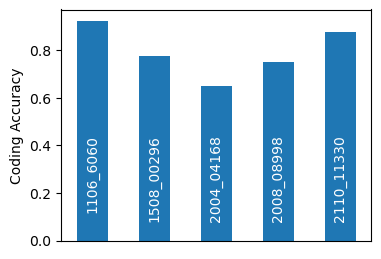

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,3))
ax = code_paper_df.plot(kind='bar', legend=False,ax=ax)
ax.tick_params(axis='x', pad=-80, color='w', labelcolor='w')
ax.set_ylabel('Coding Accuracy')

## Code: for different tasks

In [31]:
code_task={}
for paper in paper_list:
    code_task[paper]=df[paper][['answer1', 'answer2', 'answer3', 'answer4']].applymap(lambda x: maps_[x]).values.mean(axis=0)

In [32]:
code_task_mean = np.stack(list(code_task.values())).mean(axis=0)
code_task_mean_df = pd.DataFrame(code_task_mean, index=["Task 1", "Task 2", "Task 3", "Task 4"], columns=["Mean Value"])
code_task_mean_df

,Mean Value
Task 1,0.98
Task 2,0.90
Task 3,0.88
Task 4,0.42


Text(0, 0.5, 'Coding Accuracy')

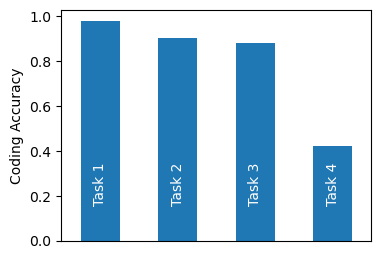

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,3))
ax = code_task_mean_df.plot(kind='bar', legend=False,ax=ax)
ax.tick_params(axis='x', pad=-60, color='w', labelcolor='w')
ax.set_ylabel('Coding Accuracy')

In [23]:
df[paper_list[2]]

,answer1,answer2,answer3,answer4,paper,trial_idx
1,correct,incorrect,"correct, F",incorrect,2004.04168,1
2,correct,correct,correct,incorrect,2004.04168,2
3,correct,correct,correct,incorrect,2004.04168,3
4,correct,correct,correct,correct,2004.04168,4
5,correct,correct,correct,incorrect,2004.04168,5
6,correct,correct,correct,correct,2004.04168,6
7,correct,incorrect,incorrect,incorrect,2004.04168,7
8,correct,correct,correct,incorrect,2004.04168,8
9,correct,correct,correct,incorrect,2004.04168,9
10,correct,incorrect,incorrect,incorrect,2004.04168,10


In [20]:
code_paper[paper_list[1]]

0.775

In [22]:
1-9/40

0.775